In [1]:
from pyopenms import *
import matplotlib.pyplot as plt

In [2]:
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    
    obs_int = [element / max(obs_int) for element in obs_int]  # relative intenstiy
    theo_int = [element * -1 for element in theo_int]  # invert the intensity for the mirror plot
    plt.figure(figsize=(12, 8))
    plt.bar(obs_mz, obs_int, width=3.0)
    plt.bar(theo_mz, theo_int, width=3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')
    plt.show()

In [13]:
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("ea07036.mzML","yeast.fasta", protein_ids, peptide_ids)

In [14]:
print(len(peptide_ids),len(protein_ids))

4 1


Peptide Index m/z: 1368
 - Peptide hit sequence: EYDQFINSIR
Spectrum 1 of EYDQFINSIR has 34 peaks.
y1++ is generated at m/z 88.06311469007102
y2++ is generated at m/z 144.60514686552102
b2++ is generated at m/z 147.06023822197102
y1+ is generated at m/z 175.118952913371
y3++ is generated at m/z 188.121161445271
b3++ is generated at m/z 204.573710301721
y4++ is generated at m/z 245.142625540971
b4++ is generated at m/z 268.602999429321
y2+ is generated at m/z 288.203017264271
b2+ is generated at m/z 293.113199977171
y5++ is generated at m/z 301.684657716421
b5++ is generated at m/z 342.13720657287104
y6++ is generated at m/z 375.218864859971
y3+ is generated at m/z 375.235046423771
b6++ is generated at m/z 398.67923874832104
b3+ is generated at m/z 408.140144136671
y7++ is generated at m/z 439.248153987571
b7++ is generated at m/z 455.70070284402107
y4+ is generated at m/z 489.277974615171
y8++ is generated at m/z 496.761626067321
b8++ is generated at m/z 499.21671742377106
b4+ is gener

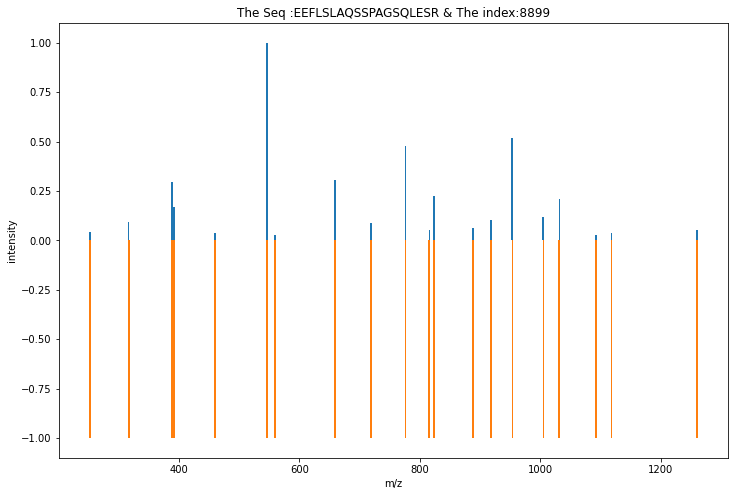

Peptide Index m/z: 13160
 - Peptide hit sequence: FIIQFLQDFLHSK
Spectrum 1 of FIIQFLQDFLHSK has 46 peaks.
y1++ is generated at m/z 74.06004069007102
y2++ is generated at m/z 117.57605526982101
b2++ is generated at m/z 131.08351578577103
y1+ is generated at m/z 147.112804913371
y3++ is generated at m/z 186.10551138147102
b3++ is generated at m/z 187.62554796122103
y2+ is generated at m/z 234.14483407287105
y4++ is generated at m/z 242.64754355692102
b4++ is generated at m/z 251.65483708882104
b2+ is generated at m/z 261.159755104771
y5++ is generated at m/z 316.181750700471
b5++ is generated at m/z 325.1890442323711
y3+ is generated at m/z 371.20374629617106
y6++ is generated at m/z 373.695222780221
b3+ is generated at m/z 374.24381945567103
b6++ is generated at m/z 381.7310764078211
y7++ is generated at m/z 437.724511907821
b7++ is generated at m/z 445.7603655354211
y4+ is generated at m/z 484.28781064707107
y8++ is generated at m/z 494.266544083271
b4+ is generated at m/z 502.30239771

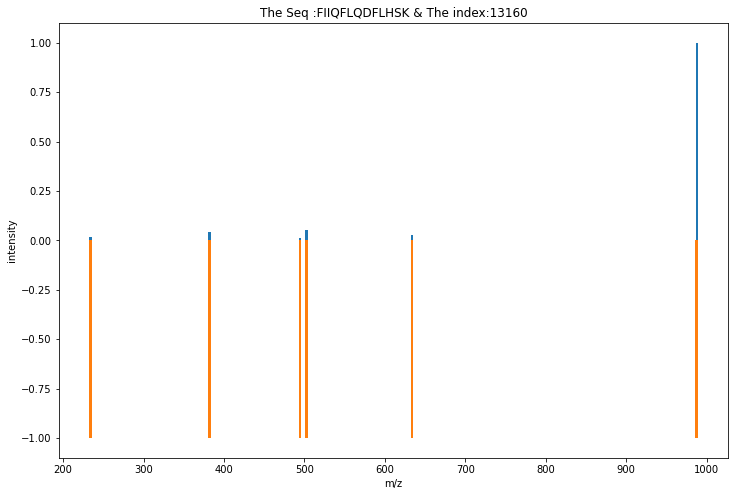

Peptide Index m/z: 21676
 - Peptide hit sequence: DGNAPSLGNDTDFR
Spectrum 1 of DGNAPSLGNDTDFR has 50 peaks.
b2++ is generated at m/z 87.031480594371
y1++ is generated at m/z 88.06311469007102
b3++ is generated at m/z 144.052944690071
y2++ is generated at m/z 161.59732183362104
b2+ is generated at m/z 173.05568472197098
y1+ is generated at m/z 175.118952913371
b4++ is generated at m/z 179.571501769821
y3++ is generated at m/z 219.11079391337103
b5++ is generated at m/z 228.09788388147098
y4++ is generated at m/z 269.634633525021
b6++ is generated at m/z 271.61389846122097
b3+ is generated at m/z 287.09861291337097
y2+ is generated at m/z 322.1873672004711
y5++ is generated at m/z 327.148105604771
b7++ is generated at m/z 328.155930636671
b8++ is generated at m/z 356.666662684521
b4+ is generated at m/z 358.13572707287096
y6++ is generated at m/z 384.169569700471
y7++ is generated at m/z 412.680301748321
b9++ is generated at m/z 413.688126780221
y3+ is generated at m/z 437.2143113599711


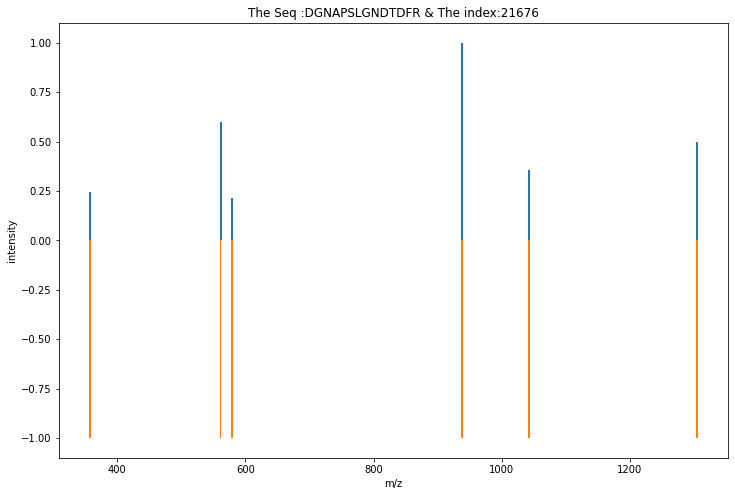

In [15]:
for peptide_id in peptide_ids:
    print (35*"=")
    print ("Peptide Index m/z:", peptide_id.getMetaValue("scan_index"))
    for hit in peptide_id.getHits():
        index=str(peptide_id.getMetaValue("scan_index"))
        seq=str( hit.getSequence())
        print(" - Peptide hit sequence:", hit.getSequence())
        tsg = TheoreticalSpectrumGenerator()
        theo_spec = MSSpectrum()
        p = Param()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        peptide = AASequence.fromString(hit.getSequence().toString())
        tsg.getSpectrum(theo_spec, peptide, 1, 2)
        # Iterate over annotated ions and their masses
        print("Spectrum 1 of", peptide, "has", theo_spec.size(), "peaks.")
        for ion, peak in zip(theo_spec.getStringDataArrays()[0], theo_spec):
            print(ion.decode(), "is generated at m/z", peak.getMZ())
        exp = MSExperiment()
        MzMLFile().load("ea07036.mzML", exp)
        spectra = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
        # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)
        # align both spectra
        spa.getSpectrumAlignment(alignment, theo_spec, spectra)

        # Print matching ions and mz from theoretical spectrum
        if(len(alignment)!=0):
            print("Number of matched peaks: " + str(len(alignment)))
            print("ion\ttheo. m/z\tobserved m/z")

        
            for theo_idx, obs_idx in alignment:
                ion_name = theo_spec.getStringDataArrays()[0][theo_idx].decode()
                ion_charge = theo_spec.getIntegerDataArrays()[0][theo_idx]
                print(ion_name + "\t" + str(ion_charge) + "\t"
                      + str(theo_spec[theo_idx].getMZ())
                      + "\t" + str(spectra[obs_idx].getMZ()))

            theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
            for theo_idx, obs_idx in alignment:
                theo_mz.append(theo_spec[theo_idx].getMZ())
                theo_int.append(theo_spec[theo_idx].getIntensity())
                obs_mz.append(spectra[obs_idx].getMZ())
                obs_int.append(spectra[obs_idx].getIntensity())
            if(max(obs_int)!=0):
                title ="The Seq :"+ seq+" & The index:"+index
                mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)
        
